<a href="https://colab.research.google.com/github/rhdmsggg/Colab_machine_learning/blob/main/03_2_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#k-최근접 이웃의 한계

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눈다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

# k-최근접 이웃 회귀 모델을 훈련한다.
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [5]:
print(knr.predict([[50]]))

[1033.33333333]


#50cm 농어의 이웃

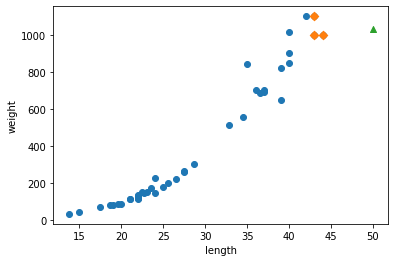

In [7]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이웃 샘플의 타깃의 평균 구하기

In [8]:
print(np.mean(train_target[indexes]))

1033.3333333333333


k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다.

# 100cm 농어의 이웃

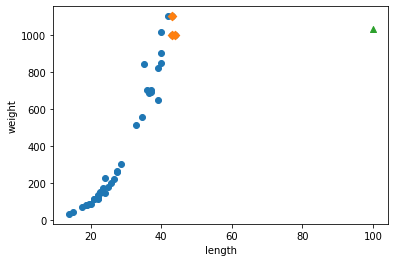

In [9]:
# 100cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 훈련 세트주에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-최근접 이웃 말고 다른 알고리즘 문제를 해결할 수 있는 알고리즘은 무엇일까

# 선형 회귀 (LinearRegression)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [13]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


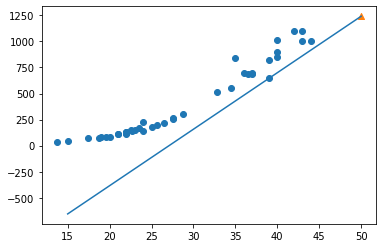

In [14]:
# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그린다
plt.plot([15,50], [15+lr.coef_+ lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50,1241.8, marker='^')
plt.show()

이 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선이다

In [15]:
print(lr.score(train_input, train_target)) #훈련 세트
print(lr.score(test_input, test_target)) #테스트 세트

0.9398463339976039
0.8247503123313558


선형 모델 단점 : x좌표가 음수로 나온다

# 다항 회귀

최적의 곡선

In [16]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


## 모델 다시 훈련

In [18]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [19]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


이 모델은 다음과 같은 그래프를 학습했다.


> **무게 = 1.01 X 길이² - 21.6 X 길이 + 116.05**




## 학습한 직선 그리기

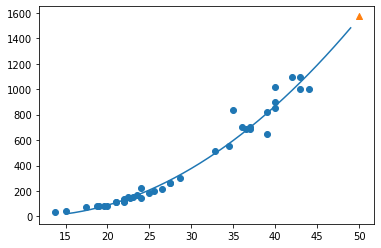

In [21]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그린다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker ='^')
plt.show()

In [22]:
print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


#마무리



*   선형 회귀는 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는다.

특성이 하나면 직선 방정식이 된다.
*   선형 회귀가 찾은 특성과 타깃 사이의 관계는 선형 방정식의 계수 또는 가중치에 저장된다.



*   모델 피라미터는 선형 회귀가 찾은 가중치처럼 머신러닝 모델이 특성에서 학습한 파라미터를 말한다.

*   다항 회귀는 다항식을 사용하여 특성과 타깃 사이의 관계를 나타낸다. 이 함수는 비선형일 수 있지만 여전히 선형 회귀로 표현할 수 있다.



